# Acoustic Exercises

Sources:

[1] Bohlen, Thomas, et al. "Visco-acoustic full waveform seismic inversion: from a DG forward solver to a Newton-CG inverse solver." (2020).

[2] Liu, Hsi-Ping, Don L. Anderson, and Hiroo Kanamori. "Velocity dispersion due to anelasticity; implications for seismology and mantle composition." Geophysical Journal International 47.1 (1976): 41-58.

### Exercise (1D Wave Equation)

### Visco Acoustic Wave Equation

Consider the visco-acoustic wave equation on the bounded domain $\Omega \subset \mathbb{R}^d$ with Lipschitz boundary $\partial \Omega = \Gamma_{\text{dyn}} \cup \Gamma_{\text{stat}}$ as well as on the time interval $[0, T]$ with the Generalized Standard
Linear Solid (GSLS) model for the rheological rock attenuation. In this model

Springs and Maxwell bodies? $\kappa_l$ with $l=1, \dots, L$

The first oder system of the wave equation in visco-acoustic media descirbes the evolution of the pressure $p \colon \Omega \times [0,T] \to \mathbb{R}$ and the particle velocity vector $\boldsymbol{v} \colon \Omega \times [0, T] \to \mathbb{R}^d$ by the balance of momentum

$$
\varrho \partial_{t} \boldsymbol{v}=\nabla p+\boldsymbol{f},
$$

where $\rho \colon \Omega \to \mathbb{R}$ ist the mass density of the media and $\boldsymbol{f} \colon \Omega \times [0, T] \to \mathbb{R}^{d + 1}$ ist the source term for the pressure and the velocity.

and the constitutive equation 

$$
\partial_{t} p(t)=\kappa \nabla \cdot \boldsymbol{v}(t)+\int_{0}^{t} \dot{\kappa}(t-s) \nabla \cdot \boldsymbol{v}(s) \mathrm{d} s
$$




$$
\begin{aligned}
\varrho \partial_{t} \boldsymbol{v}-\nabla p &=\boldsymbol{f} \\
\partial_{t} p_{0}-\kappa_{0} \nabla \cdot \boldsymbol{v} &=g_{0} \\
\partial_{t} p_{l}-\kappa_{l} \nabla \cdot \boldsymbol{v}+\tau_{l}^{-1} p_{l} &=g_{l}, \quad l=1, \ldots, L
\end{aligned}
$$

$\rho \in L^\infty(\Omega, \mathbb{R}_+)$, 
$$
    \begin{align*}
        \rho \partial_t v - \nabla(p_0 + \dots p_r) &= f, \\
        \partial p_0 - \kappa_0 \nabla \cdot v      &= 0, \\
        \partial_t - 
    \end{align*}
$$


### Discontinuous Galerkin Method

The visco-acoustic wave quation is approximated in the discontinuous Galerkin (dG) finite elment space

$$
V^{\text{dG}}_{h}=\left\{\boldsymbol{v}_{h} \in \mathrm{L}_{2}\left(\Omega ; \mathbb{R}^{d+1+L}\right):\left.\boldsymbol{v}_{h}\right|_{K} \in \mathbb{P}_{k}\left(\mathbb{R}^{d+1+L}\right) \text { for all } K \in \mathcal{K}\right\}
$$

with polyinomial degree $k \geq 0$. The domain $\Omega$ is decomposed into open and convex polyedral cells $K \subset \Omega$ with ...



In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/ardar/mpp/build
-- PROJECT_SOURCE_DIR= /home/ardar/mpp
-- PROJECT_MPP_DIR=    /home/ardar/mpp
-- Option:     BUILD_UQ= OFF   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1e100   (using cached value)
-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option

0

### Riemann Problem 

In [2]:
mpp.clean_data()
mpp.reset_data()

kwargs = {}
levels = [3, 4]
dts = [0.02, 0.01, 0.005]

for level in levels:
    for dt in dts:
        kwargs["dt"] = dt
        kwargs["level"] = level
        mpp.run(8, config="TUT_acoustic_riemann", kwargs=kwargs)
        mpp.parse_json()



================ running  mpp ================

start program on 8 procs at Sun Mar 24 13:24:16 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     ConfigVerbose: ........................... 1
     dampingFlux: ............................. 0
     degree: .................................. 1
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     f_source: ................................ 25
     flux_alpha: .............................. 1
     level: ................................... 3
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 200
     LinearVerbose: ........................... 0
     MeshVerbose: ............................. 1
     Model: ................................... DGAcoustic
     normal_x: ..................

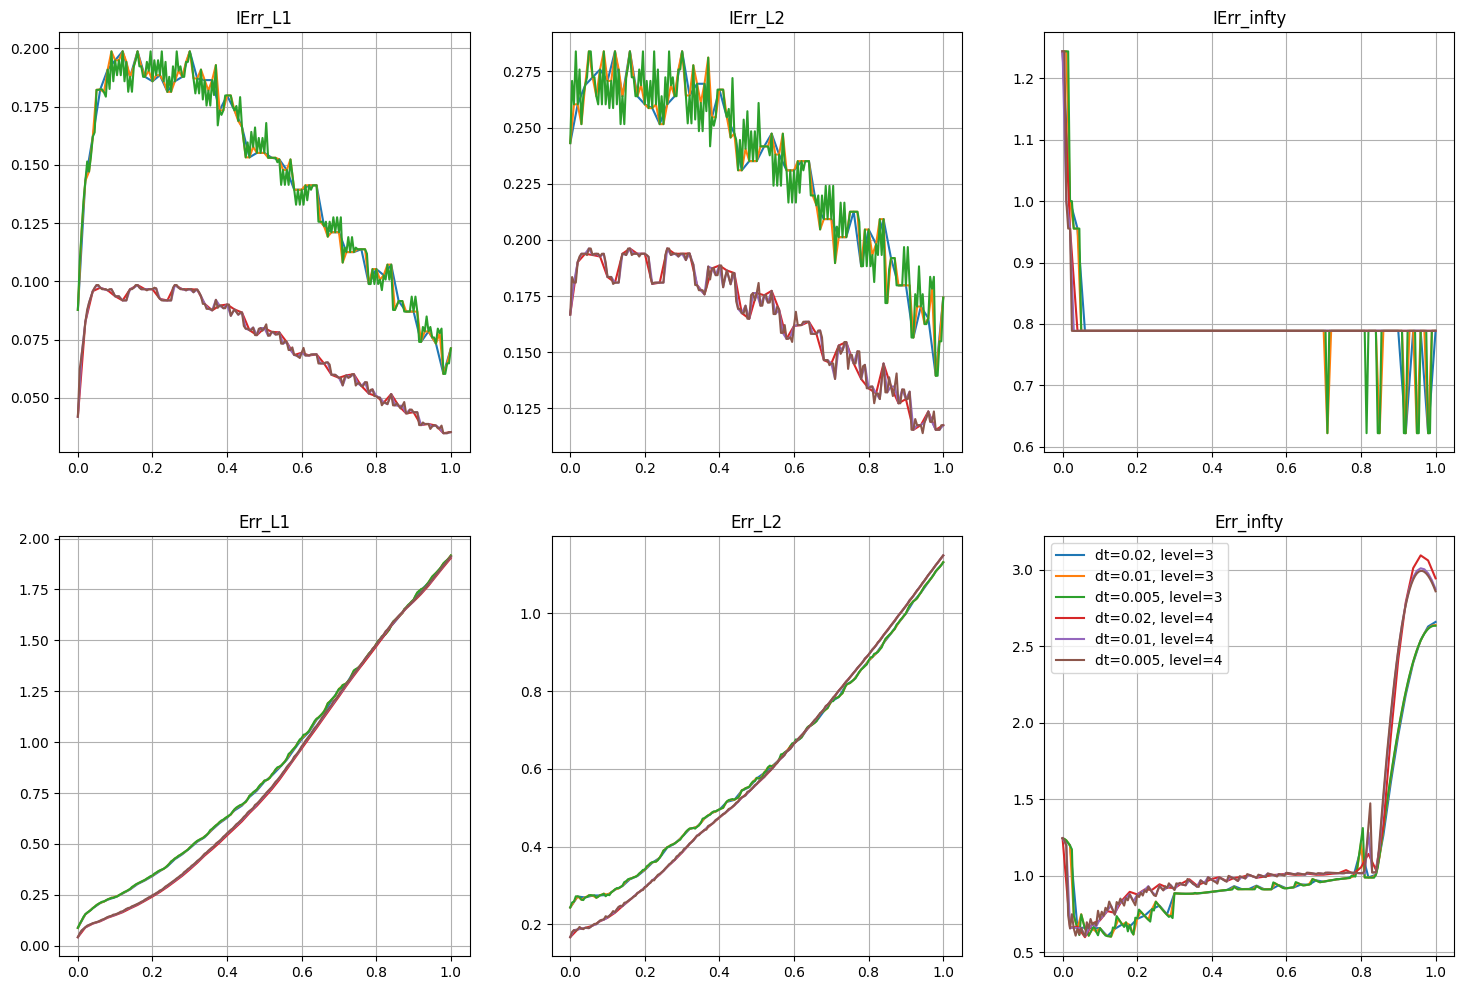

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = [ax for ax_row in axes for ax in ax_row]
errs = ["IErr_L1", "IErr_L2", "IErr_infty", "Err_L1", "Err_L2", "Err_infty"]

for index1, level in enumerate(levels):
    for index2, dt in enumerate(dts):
        run = index1 * len(dts) + index2
        for ax, err in zip(axes, errs):            
            ax.plot([d["t"] for d in mpp.data[run]["AcousticPDESolver"]["iteration_0"]],
                    [d[err] for d in mpp.data[run]["AcousticPDESolver"]["iteration_0"]],
                    label="dt={}, level={}".format(dt, level))

for ax, err in zip(axes, errs):    
    ax.set_title(err)
    ax.grid()

plt.legend()
plt.show()

In [4]:
import numpy as np
import json

err_l2_lst = []
err_l1_lst = []
h_lst = []
for index, level in enumerate(levels):
    for index2, dt in enumerate(dts):
        if dt != 0.005:
            continue
        err_l2_lst.append(mpp.data[index * len(dts) + index2]["AcousticPDESolver"]["iteration_0"][-1]["Err_L2"])
        err_l1_lst.append(mpp.data[index * len(dts) + index2]["AcousticPDESolver"]["iteration_0"][-1]["Err_L1"])
        h_lst.append(json.loads(mpp.data[index * len(dts) + index2]["Mesh Info"]["Mesh width [min, max]"])[1])

def err_on_order(h_max_lst, err_lst, order): 
    sqrt_h_lst = np.array(h_lst)**(order)
    return err_lst / sqrt_h_lst
    print("Err / h_max^(" + str(order)[:4] + "):", err_lst / sqrt_h_lst)
    
print("L2Err:", err_l2_lst)
print("L1Err:", err_l1_lst)
print("h_max:", h_lst)
print("\n")
print("L2Err / h^({}) =".format(0.5), err_on_order(h_lst, err_l2_lst, 0.5))
print("L2Err / h^({}) =".format(0.4), err_on_order(h_lst, err_l2_lst, 0.4))
print("L2Err / h^({}) =".format(0.33), err_on_order(h_lst, err_l2_lst, 0.33))
print("L1Err / h^({}) =".format(0.8), err_on_order(h_lst, err_l1_lst, 0.8))
print("L1Err / h^({}) =".format(0.7), err_on_order(h_lst, err_l1_lst, 0.7))
print("L1Err / h^({}) =".format(0.66), err_on_order(h_lst, err_l1_lst, 0.66))

L2Err: [1.1317834994558253, 1.1492905558967705]
L1Err: [1.9172767508152964, 1.911897630207286]
h_max: [0.125, 0.0625]


L2Err / h^(0.5) = [3.20116715 4.59716222]
L2Err / h^(0.4) = [2.60015569 3.48399747]
L2Err / h^(0.33) = [2.2479314  2.86938902]
L1Err / h^(0.8) = [10.11944736 17.5695493 ]
L1Err / h^(0.7) = [ 8.21954537 13.31522847]
L1Err / h^(0.66) = [ 7.56352414 11.91746331]


In [5]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['Params.RiemannWave2D',
 'Params.RiemannWave2D.pvtu',
 'RiemannWave2D.0',
 'RiemannWave2D.0.pvtu',
 'RiemannWave2D.1',
 'RiemannWave2D.1.pvtu',
 'RiemannWave2D.10',
 'RiemannWave2D.10.pvtu',
 'RiemannWave2D.100',
 'RiemannWave2D.100.pvtu',
 'RiemannWave2D.101',
 'RiemannWave2D.101.pvtu',
 'RiemannWave2D.102',
 'RiemannWave2D.102.pvtu',
 'RiemannWave2D.103',
 'RiemannWave2D.103.pvtu',
 'RiemannWave2D.104',
 'RiemannWave2D.104.pvtu',
 'RiemannWave2D.105',
 'RiemannWave2D.105.pvtu',
 'RiemannWave2D.106',
 'RiemannWave2D.106.pvtu',
 'RiemannWave2D.107',
 'RiemannWave2D.107.pvtu',
 'RiemannWave2D.108',
 'RiemannWave2D.108.pvtu',
 'RiemannWave2D.109',
 'RiemannWave2D.109.pvtu',
 'RiemannWave2D.11',
 'RiemannWave2D.11.pvtu',
 'RiemannWave2D.110',
 'RiemannWave2D.110.pvtu',
 'RiemannWave2D.111',
 'RiemannWave2D.111.pvtu',
 'RiemannWave2D.112',
 'RiemannWave2D.112.pvtu',
 'RiemannWave2D.113',
 'RiemannWave2D.113.pvtu',
 'RiemannWave2D.114',
 'RiemannWave2D.114.pvtu',
 'RiemannWave2D.115',
 'Ri

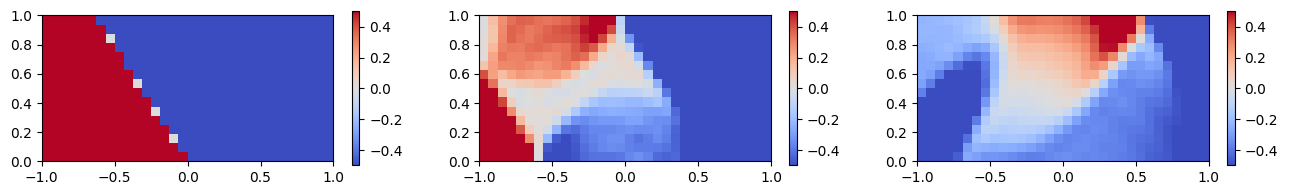

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

p = mpp.vtu_plot(figsize=(16, 2))
plt.axis('off')

gs = gridspec.GridSpec(1, 3)
p.ax1 = p.fig.add_subplot(gs[0])
p.add_vtu("RiemannWave2D.0.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax1)

p.ax2 = p.fig.add_subplot(gs[1])
p.add_vtu("RiemannWave2D.100.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax2)

p.ax3 = p.fig.add_subplot(gs[2])
p.add_vtu("RiemannWave2D.200.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax3)

### Problem Simple 

In [7]:
mpp.clean_data()
mpp.reset_data()
kwargs = {}
mpp.run(4, config="TUT_acoustic", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 13:24:42 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     ConfigVerbose: ........................... 1
     dampingFlux: ............................. 0
     degree: .................................. 0
     Distribution: ............................ RCB
     dt: ...................................... 0.005
     ElementPool: ............................. false
     f_source: ................................ 25
     flux_alpha: .............................. 1
     Keps: .................................... 1e-07
     Kmax: .................................... 150
     level: ................................... 5
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ LS
     LinearSteps: ............................. 200
     LinearVerbose: ..............

0

In [8]:
@interact(n=widgets.IntSlider(min=0, max=160, step=1, value=0))
def plot_nth_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("GaussHatAndRicker2D.{}.pvtu".format(n), vmin = -0.001, vmax = 0.001)

interactive(children=(IntSlider(value=0, description='n', max=160), Output()), _dom_classes=('widget-interact'…

### CRC Problem 

In [9]:
kwargs = {
    "level": 0,
    "dt": 0.04,
    "plot_tStep": 1
}

mpp.clean_data()
mpp.reset_data()
mpp.run(4, config="TUT_sfb", kwargs=kwargs)


================ running  mpp ================

start program on 4 procs at Sun Mar 24 13:24:44 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     ConfigVerbose: ........................... 1
     dampingFlux: ............................. 0
     degree: .................................. 1
     Distribution: ............................ RCB
     dt: ...................................... 0.04
     f_source: ................................ 25
     flux_alpha: .............................. 1
     level: ................................... 0
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 200
     LinearVerbose: ........................... 0
     MeshVerbose: ............................. 1
     Model: ................................... DGAcoustic
     numL: ......................

0

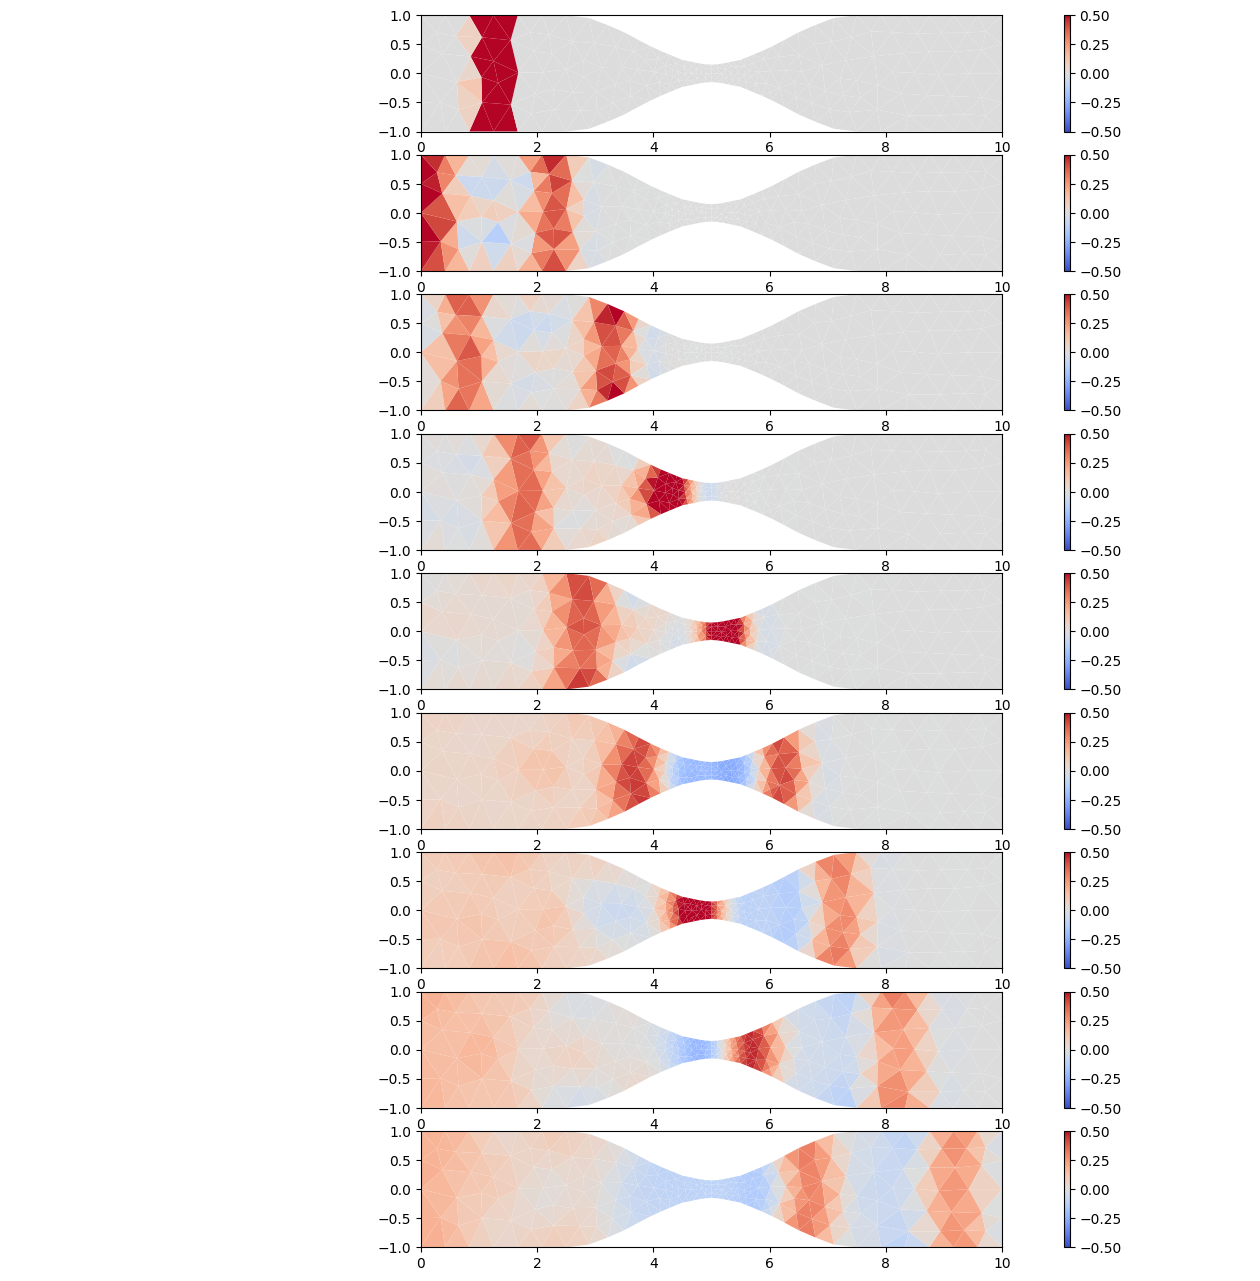

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

p = mpp.vtu_plot(figsize=(16, 16))
plt.axis('off')

gs = gridspec.GridSpec(9, 1)

for subplot in range(0, 9):
    p.ax = p.fig.add_subplot(gs[subplot])
    p.add_vtu("CRC.{}.pvtu".format(subplot * 25), vmin = -0.5, vmax = 0.5, ax=p.ax)